In [30]:
import numpy as np
import pandas as pd
from pyecharts.charts import *
import pyecharts.options as opts
from pyecharts.globals import ChartType, ThemeType
import matplotlib.pyplot as plt
from pyhanlp import *
from pyecharts.charts import WordCloud
import collections
import folium
from folium.plugins import HeatMap
import webbrowser
import json

%matplotlib inline
font = {'family' : 'SimHei',
         'weight' : 'bold',
         'size'   : '16'}
plt.rc('font', **font)               # 设置字体的更多属性,
plt.rc('axes', unicode_minus=False)  # 解决坐标轴负数的负号显示问题

%config InlineBackend.figure_format = "retina"

In [2]:
df = pd.read_excel('旅游景点.xlsx')
print(df.shape)
df.head()

(2443, 11)


,城市,名称,星级,评分,价格,销量,省/市/区,坐标,简介,是否免费,具体地址
0,上海,上海迪士尼乐园,NaN,0.0,325.0,19459,上海·上海·浦东新区,"121.667917,31.149712",每个女孩都有一场迪士尼梦,False,上海市浦东新区川沙镇黄赵路310号上海迪士尼乐园
1,上海,上海海昌海洋公园,4A,0.0,276.5,19406,上海·上海·浦东新区,"121.915647,30.917713",看珍稀海洋生物 | 玩超刺激娱乐项目,False,上海市浦东新区南汇城银飞路166号
2,上海,上海野生动物园,5A,3.6,116.0,6764,上海·上海·浦东新区,"121.728112,31.059636",全球动物聚集地 | 零距离和动物做朋友,False,上海市浦东新区南六公路178号
3,上海,东方绿舟,4A,3.5,40.0,5353,上海·上海·青浦区,"121.015977,31.107866",全国首屈一指的青少年校外教育营地,False,上海市青浦区沪青平公路6888号
4,上海,东方明珠,5A,3.8,54.0,3966,上海·上海·浦东新区,"121.50626,31.245369",感受云端漫步，品味老上海风情,False,上海市浦东新区世纪大道1号


### 数据预处理

In [3]:
# 去除无意义数据【销量为0的数据】
#df = df[df['销量']!=0]

In [4]:
df.isnull().sum()

城市          0
名称          0
星级       1530
评分          0
价格          0
销量          0
省/市/区       0
坐标          0
简介         41
是否免费        0
具体地址        3
dtype: int64

In [5]:
# 缺失值填充
df["星级"] = df["星级"].fillna(0)
df["简介"] = df["简介"].fillna('无')

In [6]:
# 经纬度提取
Lat=[]
Long=[]
for i in range(df.shape[0]):
    Long.append(df['坐标'].apply(lambda x:x.split(','))[i][0])
    Lat.append(df['坐标'].apply(lambda x:x.split(','))[i][1])
# df = df.drop('坐标', axis=1)
df['Lat'] = Lat
df['Long'] = Long

### 热门景区Top20

In [7]:
# 热门景点排名---基于销量对旅游景点进行热门排序
df_sale = df.sort_values(by = "销量", inplace = False, ascending = False)
#print(df_sale["名称"][:20])

In [8]:
b1 = (
    Bar(init_opts=opts.InitOpts(width="800px", height="450px", theme="dark"))
    .add_xaxis(list(df_sale["名称"][:20])[::-1])
    .add_yaxis('热门景点销量', list(df_sale["销量"][:20])[::-1], color="#d17b81")
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='热门景区TOP20'),
        yaxis_opts=opts.AxisOpts(name='景区'),
        xaxis_opts=opts.AxisOpts(name='销量'),
        )
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))

)
# 设置位置
# 因为 Y 轴标签会被遮挡
grid = (Grid(init_opts=opts.InitOpts(width="800px", height="450px", theme="dark"))
        .add(b1,grid_opts=opts.GridOpts(pos_left="21%"))
        )
# #grid.render_notebook()
grid.render("b1.html")
#b1.render_notebook()

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\数据可视化\\py_Visualize\\数据可视化大作业\\b1.html'

### 4A-5A景区分布情况

In [9]:
# 统计全国4A、5A景区的数量分布
df_A = df.query('星级=="4A" | 星级=="5A"')
df_A = df_A.reset_index()
df_A["星级"].value_counts()

4A    560
5A    268
Name: 星级, dtype: int64

In [10]:
df_A['城市'].groupby(df['星级']).value_counts()

星级  城市
0   江苏    43
    广东    33
    山西    32
    湖北    30
    安徽    25
          ..
5A  吉林     1
    宁夏     1
    山东     1
    新疆     1
    江苏     1
Name: 城市, Length: 104, dtype: int64

### 全国各省市假期出行数据在地图上的分布

In [34]:
# 全国各省出游情况--通过各省区景点销量展示
m = (
    Map(init_opts=opts.InitOpts(width="800px", height="450px", theme="dark"))
    .add("全国各省市假期出行数据",
         [list(z) for z in zip(df['城市'], df['销量'])], 
         "china", 
         is_map_symbol_show=False, )
    
    .set_global_opts(
        title_opts=opts.TitleOpts(title="全国各省市旅游假期出行分布"),
        visualmap_opts=opts.VisualMapOpts(max_=100000, is_piecewise=True),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))

)
m.render("Travel.html")
#m.render_notebook()

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\数据可视化\\py_Visualize\\数据可视化大作业\\Travel.html'

In [12]:
## 生成经纬度的json文件
# lon_lat = {}
# ll = [list(q) for q in zip(Long,Lat)]
# for i in range(df.shape[0]):
#     lon_lat.append({df["名称"][i]: ll[i]})
#
# with open("travel_china.json", "w", encoding='utf-8') as f:
#     json.dump(dict(zip(df["名称"],ll)), f, indent=2, ensure_ascii=False) # 写为多行

NameError: name 'll' is not defined

In [53]:
# dict(zip(df["名称"],ll))

{'上海迪士尼乐园': ['121.667917', '31.149712'],
 '上海海昌海洋公园': ['121.915647', '30.917713'],
 '上海野生动物园': ['121.728112', '31.059636'],
 '东方绿舟': ['121.015977', '31.107866'],
 '东方明珠': ['121.50626', '31.245369'],
 '上海自然博物馆': ['121.469083', '31.241294'],
 '上海佛罗伦萨小镇': ['121.770767', '31.202718'],
 '上海科技馆': ['121.54785', '31.224219'],
 '豫园': ['121.498971', '31.233463'],
 '上海动物园': ['121.369411', '31.199264'],
 '辰山植物园': ['121.188507', '31.080816'],
 '黄浦江游览（十六铺码头）': ['121.503083', '31.234893'],
 '上海中心大厦上海之巅观光厅': ['121.512867', '31.239758'],
 '东平国家森林公园': ['121.487554', '31.689225'],
 '上海影视乐园': ['121.319396', '31.016693'],
 '外滩': ['121.497854', '31.240722'],
 '上海欢乐谷': ['121.22218', '31.102491'],
 '上海杜莎夫人蜡像馆': ['121.480215', '31.240715'],
 '迪士尼小镇': ['121.668347', '31.14594'],
 '上海海洋水族馆': ['121.50818', '31.246234'],
 '浦江郊野公园奇迹花园': ['121.509672', '31.060409'],
 '广富林文化遗址': ['121.20174', '31.063886'],
 '陆家嘴': ['121.513278', '31.248139'],
 '浦江郊野公园': ['121.515951', '31.061035'],
 '豪华浦江游船（东方明珠码头）': ['121.503369', '

In [35]:
##热力图 基于pyecharts
geo = Geo(init_opts=opts.InitOpts(width="800px", height="450px", theme="dark"))
geo.add_schema(maptype="china")
#geo.add_coordinate(np.array(df["名称"]), np.array(df["Long"]), np.array(df["Lat"]))
#geo.add_coordinate_json("travel_china.json")
geo.add("geo",[list(z) for z in zip(list(df["城市"]), df["销量"])],
        type_=ChartType.HEATMAP,)
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
geo.set_global_opts(
        visualmap_opts=opts.VisualMapOpts(),
        title_opts=opts.TitleOpts(title="全国旅游热力图"),
    )
geo.render("geo.html")

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\数据可视化\\py_Visualize\\数据可视化大作业\\geo.html'

In [14]:
# [list(z) for z in zip(df['Long'], df['Lat'])]

In [18]:
hotmap = (
    BMap(init_opts=opts.InitOpts(width="800px", height="450px", theme="dark"))
    .add_schema(baidu_ak="FnGxwalke6SfSOH3IfmV3PTGfHxXOtDg", center=[120.13066322374, 30.240018034923])
    .add(
        "bmap",
        [list(z) for z in zip(list(df["城市"]), df["销量"])],
        type_="heatmap",
        label_opts=opts.LabelOpts(formatter="{b}"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="全国旅游热力图"), visualmap_opts=opts.VisualMapOpts()
    )
    .render("bmap_heatmap.html")
)

In [37]:
title = (
    Pie(init_opts=opts.InitOpts(width="600px", height="100px",theme=ThemeType.DARK))# 不画图，只显示一个标题，用来构成大屏的标题
#        theme=ThemeType.CHALK
    .set_global_opts(
        title_opts=opts.TitleOpts(title="全国旅游数据可视化大屏",
                                  title_textstyle_opts=opts.TextStyleOpts(font_size=30,
#                                                                           color='#FFFFFF',
                                                                         ),
                                  pos_top=10
                                 )
        )
)

In [32]:
## 热力图 基于folium
# 获取经纬度数据
LOC = []
# 此处必须使用zip构成元组
for lng,lat in zip(list(Long),list(Lat)):
    LOC.append([lat, lng])
    
Center=[np.mean(np.array(Lat,dtype='float32')),np.mean(np.array(Long,dtype='float32'))]
mh=folium.Map(location=Center,zoom_start=6.5)
HeatMap(LOC).add_to(mh)
mh.save('Travel1.html')
webbrowser.open('Travel1.html')

True

### 全国各景点简介文本统计词云图

In [19]:
# 汇总文本数据
text = ''
for i in range(df.shape[0]):
    text += df["简介"][i]

In [20]:
#中文分词
text1 = HanLP.segment(text)

In [21]:
#对分词进行排序
count = collections.Counter([term.word for term in text1])

In [22]:
len(count)

7617

In [23]:
# 导入停用词
customer_stopwords = [word.strip() for word in open('stopwords.txt',encoding='utf-8')]
stopwords = set()
stopwords.update(customer_stopwords)
# 去除停用词
count_dict = dict(count)
res = {}
for key in count_dict:
    if key not in stopwords:
        res[key] = count_dict[key]

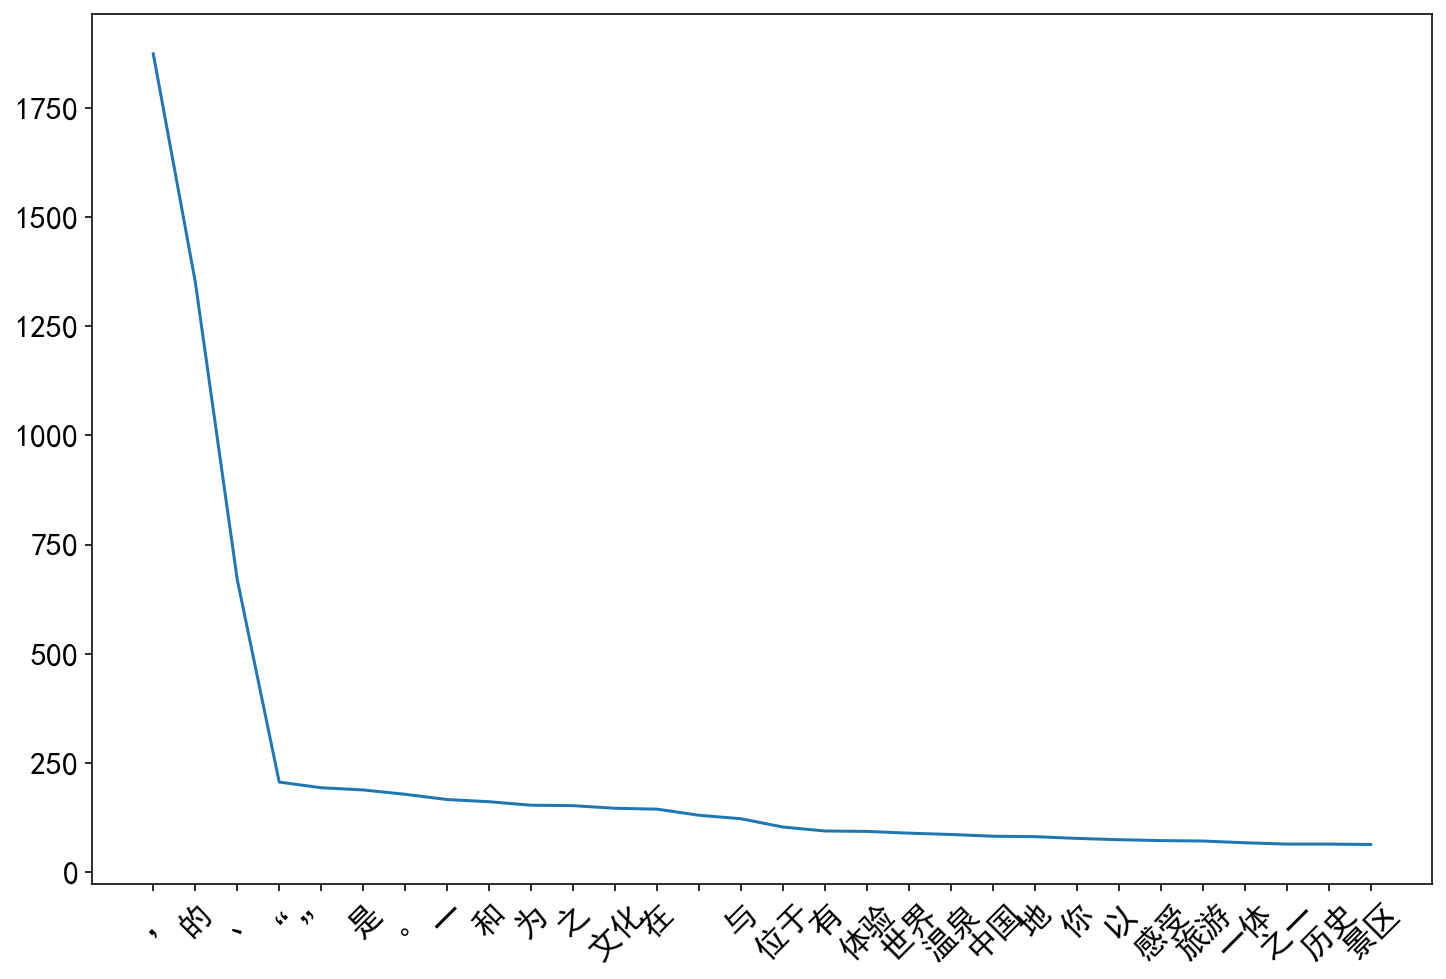

In [24]:
word_list = count.most_common(30)
word,freq = zip(*word_list)
plt.figure(figsize=(12,8))
plt.plot(word[:30],freq[:30])
plt.xticks(rotation=45)
plt.show()

In [26]:
# 词云图绘制
w2 = (
    WordCloud(init_opts=opts.InitOpts(width="800px", height="450px", theme="dark"))
    .add(
        "", 
        #count.most_common(200), 
        collections.Counter(res).most_common(150),
        word_size_range=[15, 150],
        textstyle_opts=opts.TextStyleOpts(font_family="cursive"),
        shape='pentagon'
        #mask_image='拜年老虎.png'
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="旅游景点简介词云图"),
    )
)
w2.render('全国旅游景区-简介词云图.html')

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\数据可视化\\py_Visualize\\数据可视化大作业\\全国旅游景区-简介词云图.html'

### 仪表盘

In [38]:
page = Page(layout= Page.DraggablePageLayout, page_title= "大屏展示")
page.add(title,b1,w2,m,geo)
page.render("数据大屏.html")
from bs4 import BeautifulSoup
with open("数据大屏.html", "r+", encoding='utf-8') as html:
    html_bf = BeautifulSoup(html, 'lxml')
    body = html_bf.find("body") # 根据标签名称定位到body标签
    body["style"] = "background-color:#333333;" # 修改背景颜色
    html_new = str(html_bf) # 将BeautifulSoup对象转换为字符
    html.write(html_new) # 将由BeautifulSoup对象转换得到的字符重新写入html文件
    html.close()